In [2]:
import os
print(os.listdir())



['.config', 'housing.csv', 'sample_data']


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
housing=pd.read_csv('housing.csv')


Question 1. Load the dataset , print the complete information of the dataset and name the column that has missing value .



In [6]:
df = pd.read_csv('housing.csv')
print(df.info())
print("column that has missing values is total_bedrooms")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           5000 non-null   float64
 1   latitude            5000 non-null   float64
 2   housing_median_age  5000 non-null   int64  
 3   total_rooms         5000 non-null   int64  
 4   total_bedrooms      4908 non-null   float64
 5   population          5000 non-null   int64  
 6   households          5000 non-null   int64  
 7   median_income       5000 non-null   float64
 8   median_house_value  5000 non-null   int64  
 9   ocean_proximity     5000 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 390.8+ KB
None
column that has missing values is total_bedrooms


Question 2 Create a data set by filling the missing data with the mean value of the total_bedrooms column in the original data set and print first 10 rows of the dataset.



In [7]:
housing_data=pd.read_csv("housing.csv")
mean = housing_data['total_bedrooms'].mean()
housing_data['total_bedrooms'].fillna(mean, inplace=True)
print(housing_data.head(10))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   
5    -122.25     37.85                  52          919           213.0   
6    -122.25     37.84                  52         2535           489.0   
7    -122.25     37.84                  52         3104           687.0   
8    -122.26     37.84                  42         2555           665.0   
9    -122.25     37.84                  52         3549           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401   

Question 3. Write a Python program using NumPy to normalize the total_rooms column data.



In [8]:
normalized_total_rooms = (housing_data.total_rooms - np.mean(housing_data.total_rooms)) / np.std(housing_data.total_rooms)


print(normalized_total_rooms)


0      -0.834985
1       2.596634
2      -0.511081
3      -0.617577
4      -0.422793
          ...   
4995    0.134521
4996   -0.099993
4997    0.101413
4998   -0.107718
4999   -0.612611
Name: total_rooms, Length: 5000, dtype: float64


Question 4. Calculate the average 'median_income' for each 'ocean_proximity' category.



In [9]:
average_income_by_proximity = housing_data.groupby('ocean_proximity')['median_income'].mean()

print(average_income_by_proximity)

ocean_proximity
<1H OCEAN     3.689626
INLAND        3.032107
NEAR BAY      3.892279
NEAR OCEAN    2.473104
Name: median_income, dtype: float64


Question 5. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.


In [11]:
import warnings
warnings.filterwarnings("ignore")
housing_data["total_bedroom_size"] = None
for j, i in enumerate(housing_data.total_bedrooms):
    if i <= 10:
        housing_data["total_bedroom_size"][j] = "small"
    elif i >= 11 and i<= 1000:
        housing_data["total_bedroom_size"][j] = "medium"
    else:
        housing_data["total_bedroom_size"][j] = "large"
print(housing_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0         322         126         8.3252              452600        NEAR BAY   
1        2401        1138         8.3014              358500        NEAR BAY   
2         496         177         7.2574              352100        NEAR BAY   
3         558         219         5.6431              341300        NEAR BAY   
4         565         259         3.8462              342200        NEAR BAY   

  total_bedroom_size  
0             medium  
1              large  

Question 6. Compute the correlation coefficient between 'median_income' and 'median_house_value' columns.



In [12]:
correlation_coefficient = housing['median_income'].corr(df['median_house_value'])

print(f"The correlation coefficient between 'median_income' and 'median_house_value' is {correlation_coefficient:.4f}.")

The correlation coefficient between 'median_income' and 'median_house_value' is 0.6747.


Question 7. Extract rows where 'housing_median_age' is greater than 40 and 'median_income' is less than 4.



In [13]:

filtered_housing = housing[(housing['housing_median_age'] > 40) & (housing['median_income'] < 4)]
print(filtered_housing)

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4       -122.25     37.85                  52         1627           280.0   
6       -122.25     37.84                  52         2535           489.0   
7       -122.25     37.84                  52         3104           687.0   
8       -122.26     37.84                  42         2555           665.0   
9       -122.25     37.84                  52         3549           707.0   
...         ...       ...                 ...          ...             ...   
4995    -118.30     33.99                  47         2637           588.0   
4996    -118.30     33.99                  47         2212           533.0   
4997    -118.28     33.99                  46         2577           703.0   
4998    -118.29     33.99                  46         2198           530.0   
4999    -118.28     33.99                  52         1283           342.0   

      population  households  median_income  median_house_value

Question 8. Identify and remove outliers in the 'median_house_value' column using the IQR method.



In [14]:
Q1 = housing['median_house_value'].quantile(0.25)
Q3 = housing['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_housing = housing[(housing['median_house_value'] >= lower_bound) & (housing['median_house_value'] <= upper_bound)]
print(f"Original number of rows: {housing.shape[0]}")
print(f"Number of rows after removing outliers: {filtered_housing.shape[0]}")

Original number of rows: 5000
Number of rows after removing outliers: 4782


Question 9. Implement a class named DataVisualizer with a method to plot a histogram of 'median_house_value'.
Create an object for the class and call the method to show histogram in the output.

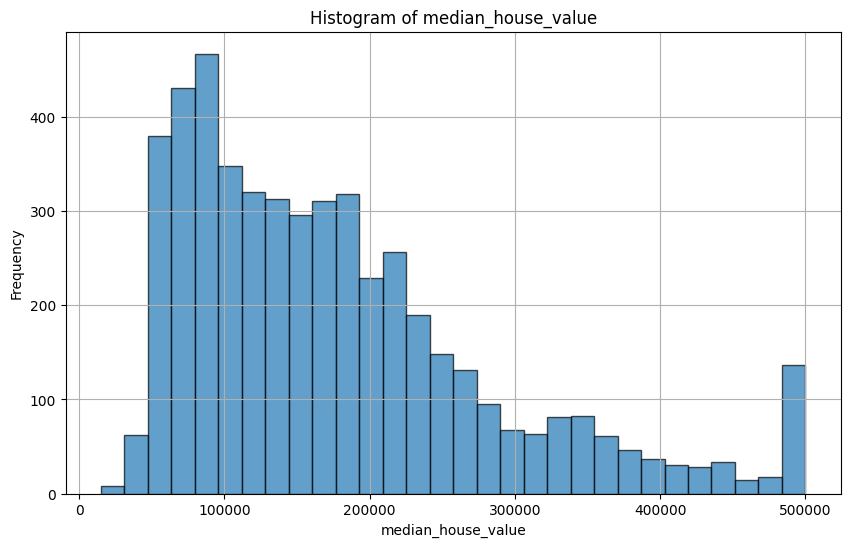

In [15]:
class DataVisualizer:
    def __init__(self, dataframe):
        self.df = dataframe

    def plot_histogram(self, column_name):
        """Plots a histogram of the specified column."""
        plt.figure(figsize=(10, 6))
        plt.hist(self.df[column_name].dropna(), bins=30, edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Load the dataset
df = pd.read_csv('housing.csv')

# Create an object of DataVisualizer
visualizer = DataVisualizer(df)

# Call the method to show the histogram
visualizer.plot_histogram('median_house_value')

Question 10. Create a scatter plot of 'median_income' against 'median_house_value'.



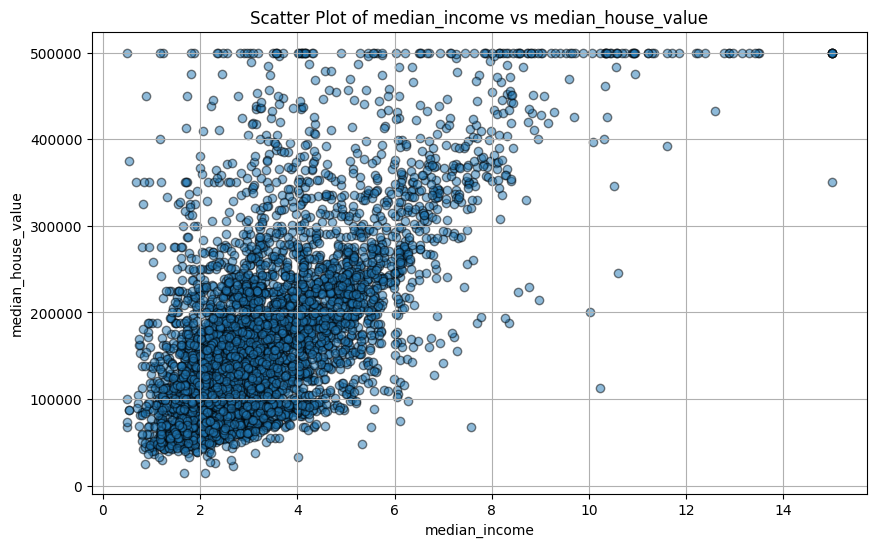

In [16]:
class DataVisualizer:
    def __init__(self, dataframe):
        self.df = dataframe

    def plot_histogram(self, column_name):
        """Plots a histogram of the specified column."""
        plt.figure(figsize=(10, 6))
        plt.hist(self.df[column_name].dropna(), bins=30, edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    def plot_scatter(self, x_column, y_column):
        """Plots a scatter plot of one column against another."""
        plt.figure(figsize=(10, 6))
        plt.scatter(self.df[x_column], self.df[y_column], alpha=0.5, edgecolor='k')
        plt.title(f'Scatter Plot of {x_column} vs {y_column}')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.grid(True)
        plt.show()

# Load the dataset
df = pd.read_csv('housing.csv')

# Create an object of DataVisualizer
visualizer = DataVisualizer(df)

# Call the method to show the scatter plot
visualizer.plot_scatter('median_income', 'median_house_value')